Dado 2 V.A independentes com distribuição Normal com médias zero e desvio padrões 1. Gere uma sequência com 5000 amostras para cada uma delas. Então, obtenha a variável aleatória $Z = a \cdot X + b \cdot Y + C$. Calcule $Cov(X, Y), Cov(X, Z), E[Z]$ e $Var(Z)$ e compare com os valores teóricos. Plote os gráficos de dispersão de $(X, Z)$ e analise o resultado. Utilize $a=1$, $b=\{-10, -1, -0.1, 0, 0.1, 1, 10\}$ e C é uma constante. Utilize $C = \{0, 5\}$

## Solução

### Parte 1) Cálculo das métricas

Para os cálculos, deverão ser consideradas as seguintes propriedades para computar os valores teóricos:

* $E[aX + B] = a \cdot E[X] + b$
* $Var(X) = σ^2(X)$
* $Var(aX) = a^2 \cdot Var(X)$
* $Cov(X, Y) = E[(X - E[X])\cdot(Y - E[Y])] = \frac{\sum_{i=1}^{n} (x - m_x)\cdot(y-m_y)}{n}$

A partir dessas propriedades, poderemos ter os seguintes valores:

Métricas calculadas | Valor teórico da métrica | Valor real da métrica
--------------------|--------------------------|-------------
$Cov(X,Y)$          | $\frac{\sum_{i=1}^{n} (x - m_x)\cdot(y-m_y)}{n}$ | `np.cov(X, Y)[0,1]`
$Cov(X,Z)$          | $\frac{\sum_{i=1}^{n} (x - m_x)\cdot(z-m_z)}{n}$ | `np.cov(X, Z)[0,1]`
$E[Z]$              | $a \cdot mean + b \cdot mean + c$    | `z.mean()`
$Var(Z)$            | $a^2 \cdot std^2 + b^2 \cdot std^2$  | `z.var()`

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Valores de média, desvio padrão e tamanho da distribuição normal
mean = 0
std = 1
size = 5000

# Valores das variáveis a, b, e c
a = 1
list_b = [-10, -1, -0.1, 0, 0.1, 1, 10]
list_c = [0, 5]

# Definição das 3 variáveis aleatórias
x = stats.norm.rvs(loc=mean, scale=std, size=size, random_state=None)
y = stats.norm.rvs(loc=mean, scale=std, size=size, random_state=None)

for b in list_b:
  for c in list_c:

    print(f'------------- a = {a}, b = {b}, c = {c} ----------------')

    z = a*x + b*y + c

    # Cálculo de Cov(X,Y)
    real_cov_xy = np.cov(x, y)[0,1]
    theorical_cov_xy = np.sum((x-x.mean())*(y-y.mean()))/size

    print(f"Cov(X,Y) real = {real_cov_xy:.6f}")
    print(f"Cov(X,Y) teórica = {theorical_cov_xy:.6f}")

    # Cálculo de Cov(X,Z)
    real_cov_xz = np.cov(x, z)[0,1]
    theorical_cov_xz = np.sum((x-x.mean())*(z-z.mean()))/size

    print(f"Cov(X,Z) real = {real_cov_xz:.6f}")
    print(f"Cov(X,Z) teórica = {theorical_cov_xz:.6f}")

    # Cálculo de E[Z]
    real_mean_z = z.mean()
    theorical_mean_z = a*mean + b*mean + c

    print(f"E[Z] real = {real_mean_z:.6f}")
    print(f"E[Z] teórico = {theorical_mean_z:.6f}")

    # Cálculo de Var(Z)
    real_var_z = z.var()
    theorical_var_z = a**2 * std**2 + b**2 * std**2

    print(f"Var(Z) real = {real_var_z:.6f}")
    print(f"Var(z) teórico = {theorical_var_z:.6f}\n")


------------- a = 1, b = -10, c = 0 ----------------
Cov(X,Y) real = 0.016342
Cov(X,Y) teórica = 0.016339
Cov(X,Z) real = 0.831570
Cov(X,Z) teórica = 0.831404
E[Z] real = -0.053458
E[Z] teórico = 0.000000
Var(Z) real = 101.039184
Var(z) teórico = 101.000000

------------- a = 1, b = -10, c = 5 ----------------
Cov(X,Y) real = 0.016342
Cov(X,Y) teórica = 0.016339
Cov(X,Z) real = 0.831570
Cov(X,Z) teórica = 0.831404
E[Z] real = 4.946542
E[Z] teórico = 5.000000
Var(Z) real = 101.039184
Var(z) teórico = 101.000000

------------- a = 1, b = -1, c = 0 ----------------
Cov(X,Y) real = 0.016342
Cov(X,Y) teórica = 0.016339
Cov(X,Z) real = 0.978648
Cov(X,Z) teórica = 0.978452
E[Z] real = 0.005011
E[Z] teórico = 0.000000
Var(Z) real = 1.965825
Var(z) teórico = 2.000000

------------- a = 1, b = -1, c = 5 ----------------
Cov(X,Y) real = 0.016342
Cov(X,Y) teórica = 0.016339
Cov(X,Z) real = 0.978648
Cov(X,Z) teórica = 0.978452
E[Z] real = 5.005011
E[Z] teórico = 5.000000
Var(Z) real = 1.965825
Var(

### Parte 2) Plotagem do gráfico de dispersão (X, Z)

Percebe-se que, quanto mais significativo (seja positivo ou negativo) o valor do parâmetro $b$, maior será a correlação entre as variáveis aleatórias $X$ e $Y$. Isso ocorre porque o parâmetro $b$ está relacionado à variável $Y$, dessa forma, quanto maior $b$, maior será $Y$ e mais ele irá impactar para que a correlação entre $X$ e $Z$ não seja tão alta.

Em contrapartida, as variações do parâmetro $c$ não influenciam na correlação em si, ela continua a mesma, apenas com um deslocamento de $c$ unidades.

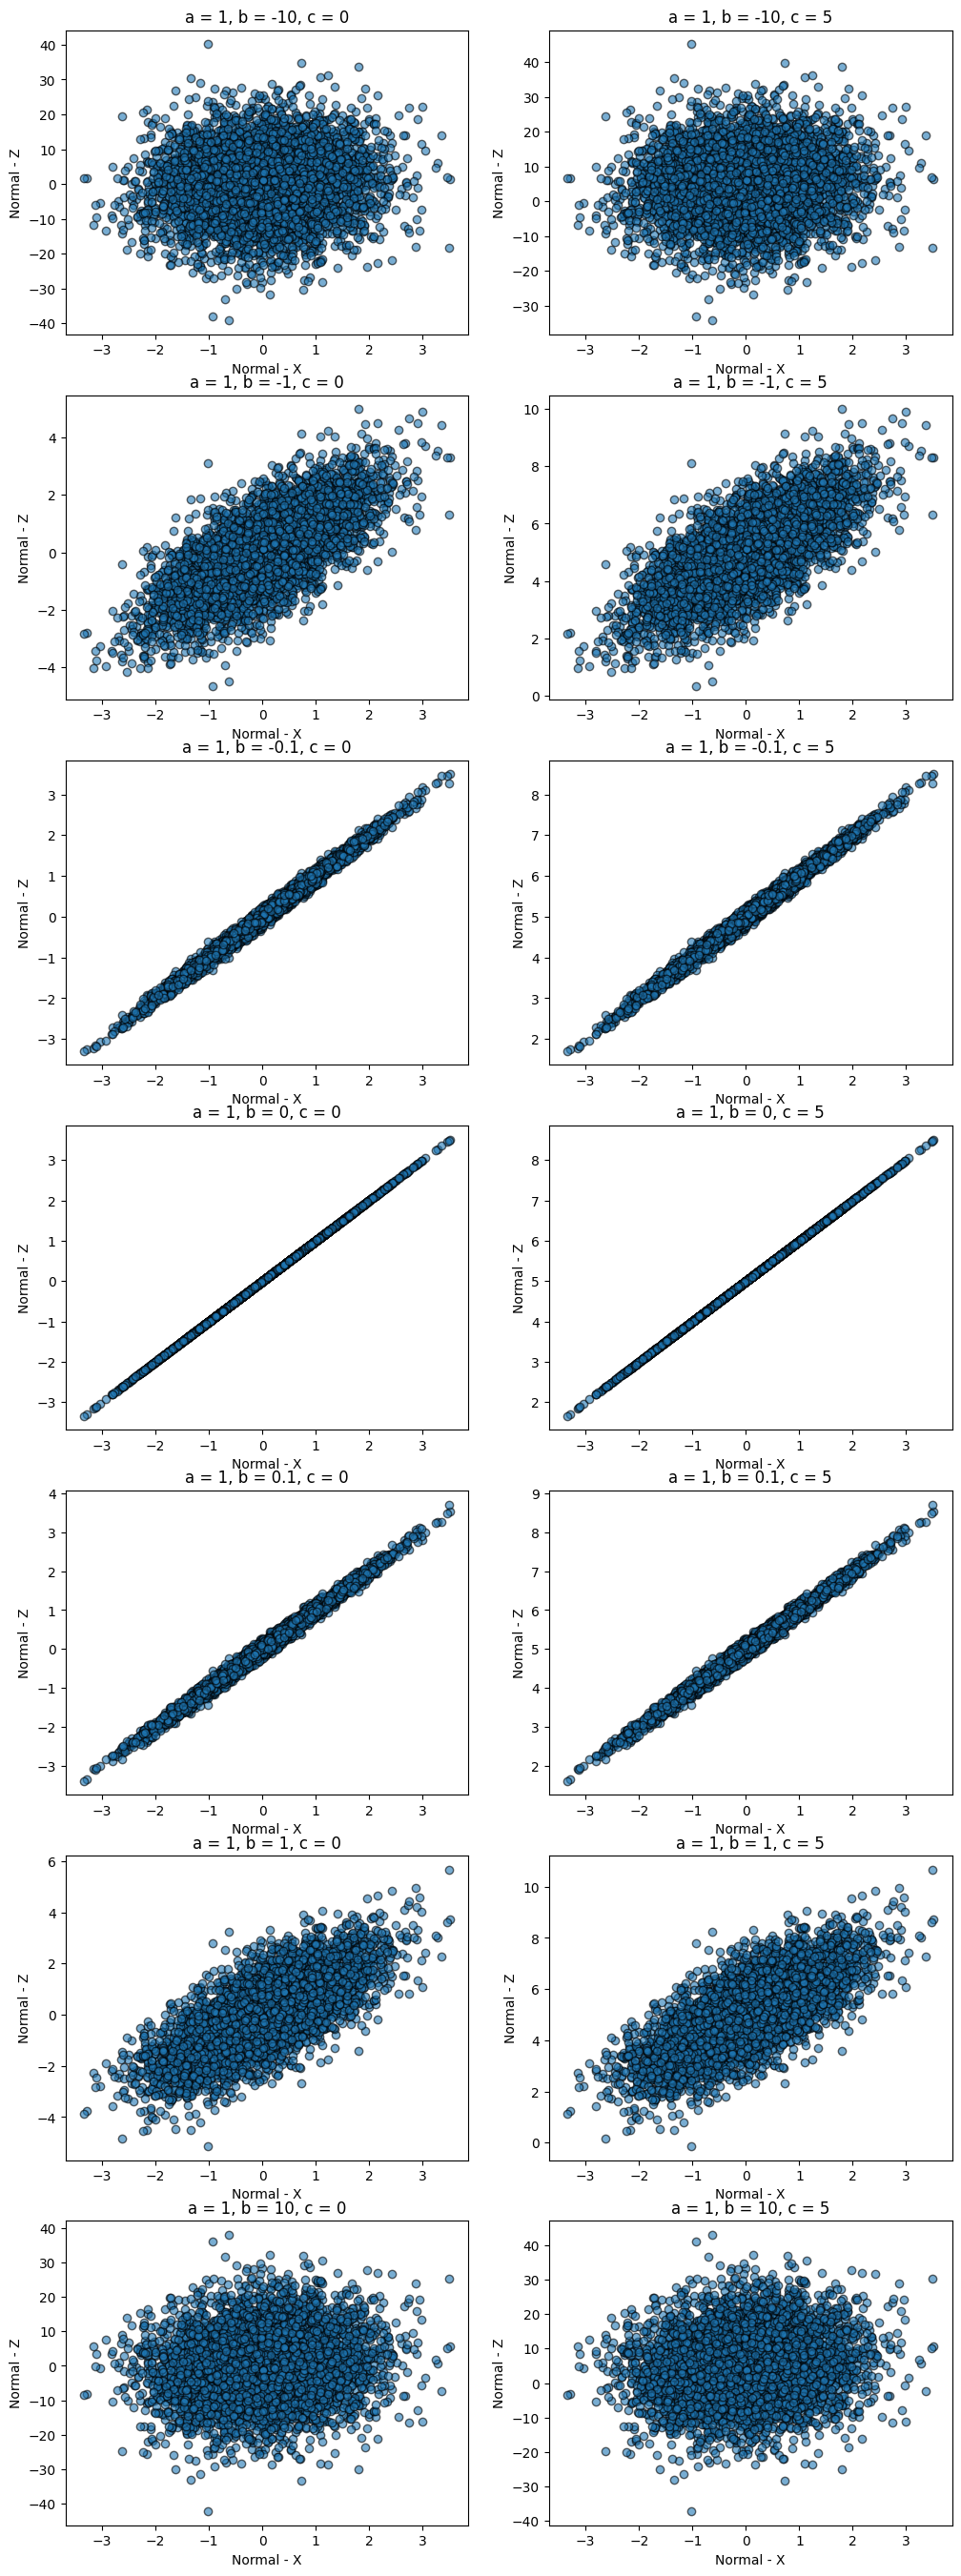

In [ ]:
# Valores de média, desvio padrão e tamanho da distribuição normal
mean = 0
std = 1
size = 5000

# Valores das variáveis a, b, e c
a = 1
list_b = [-10, -1, -0.1, 0, 0.1, 1, 10]
list_c = [0, 5]

# Definição das 3 variáveis aleatórias
x = stats.norm.rvs(loc=mean, scale=std, size=size, random_state=None)
y = stats.norm.rvs(loc=mean, scale=std, size=size, random_state=None)

fig, axs = plt.subplots(7, 2, figsize=(12, 34))
ax = 0
ay = 0

for b in list_b:
  for c in list_c:
    z = a*x + b*y + c

    axs[ax, ay].scatter(x, z, edgecolor='k', alpha=0.6)
    axs[ax, ay].set_title(f'a = {a}, b = {b}, c = {c}')
    axs[ax, ay].set_xlabel('Normal - X')
    axs[ax, ay].set_ylabel('Normal - Z')

    ay+= 1
  ay = 0
  ax += 1